<a href="https://colab.research.google.com/github/sanabriadiego/abalone_age_prediction/blob/main/abalone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
columns = ['sex', 'length', 'diameter', 'height', 'whole_height', 'shucked_weight', 'viscera_weight', 'shell_weight', 'rings']

In [3]:
df = pd.read_csv('abalone.data', names=columns)

In [4]:
df.head()

,sex,length,diameter,height,whole_height,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             4177 non-null   object 
 1   length          4177 non-null   float64
 2   diameter        4177 non-null   float64
 3   height          4177 non-null   float64
 4   whole_height    4177 non-null   float64
 5   shucked_weight  4177 non-null   float64
 6   viscera_weight  4177 non-null   float64
 7   shell_weight    4177 non-null   float64
 8   rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


DATA CLEANING

In [6]:
df['sex'].unique()

array(['M', 'F', 'I'], dtype=object)

In [7]:
sex_categories = {'F': 0, 'M': 1, 'I': 2}

In [8]:
df['sex'] = df['sex'].map(sex_categories)

In [9]:
df['sex'].unique()

array([1, 0, 2])

In [10]:
df.describe()

,sex,length,diameter,height,whole_height,shucked_weight,viscera_weight,shell_weight,rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.008379,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.796410,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [11]:
df.corr()

,sex,length,diameter,height,whole_height,shucked_weight,viscera_weight,shell_weight,rings
sex,1.000000,-0.503697,-0.516450,-0.477850,-0.501511,-0.459731,-0.505693,-0.499103,-0.401445
length,-0.503697,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
diameter,-0.516450,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
height,-0.477850,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
whole_height,-0.501511,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
shucked_weight,-0.459731,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
viscera_weight,-0.505693,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
shell_weight,-0.499103,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
rings,-0.401445,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


DATA ANALYSIS

<Axes: >

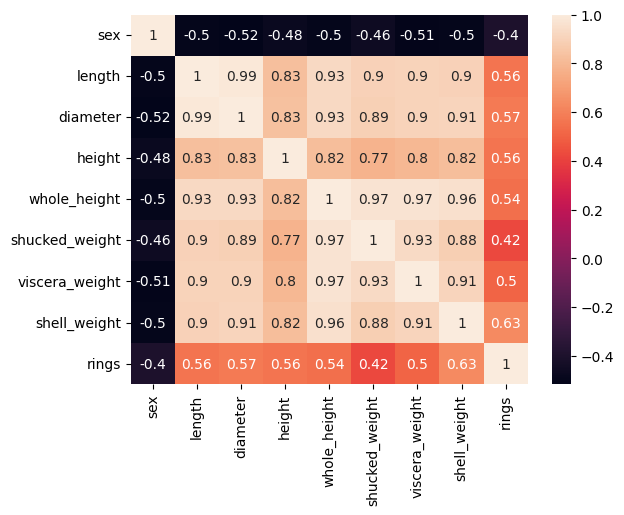

In [12]:
sns.heatmap(df.corr(), annot=True)

<Axes: xlabel='sex', ylabel='Count'>

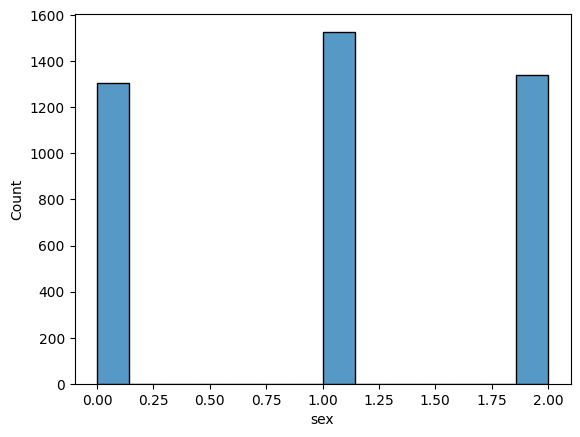

In [13]:
sns.histplot(data=df, x="sex")

<Axes: xlabel='length', ylabel='Count'>

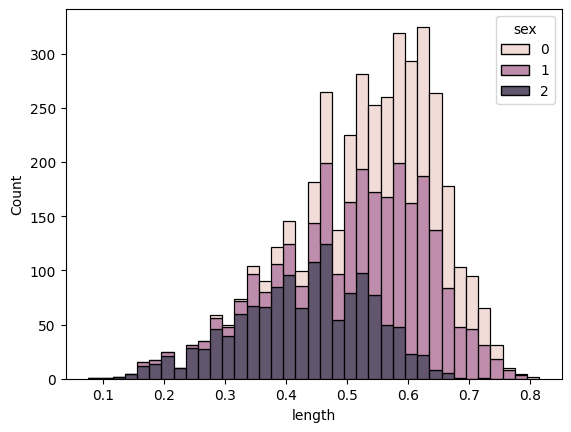

In [14]:
sns.histplot(data=df, x="length", hue="sex", multiple="stack")

<Axes: xlabel='diameter', ylabel='Count'>

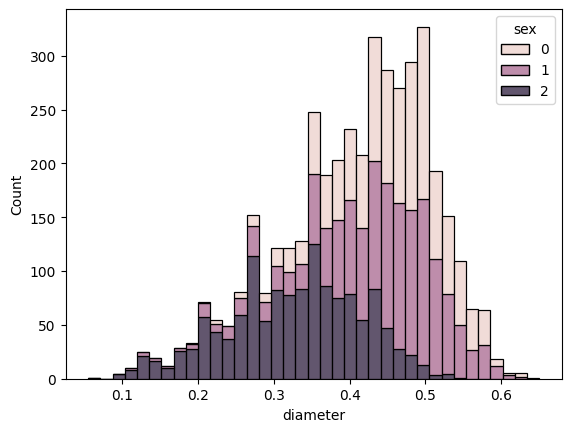

In [15]:
sns.histplot(data=df, x="diameter", hue="sex", multiple="stack")

<Axes: xlabel='rings', ylabel='shell_weight'>

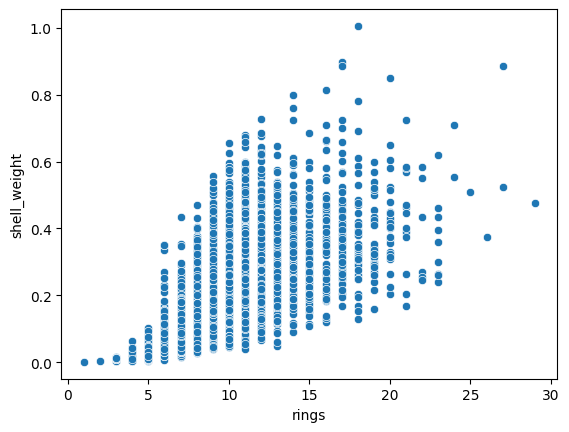

In [16]:
sns.scatterplot(data=df, x="rings", y="shell_weight")

ALGORITHM ANALYSIS

In [17]:
X = df[columns[:-1]]

In [18]:
y = df[columns[-1]]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [20]:
print(f"the shape of the training set (input) is: {X_train.shape}")
print(f"the shape of the training set (target) is: {y_train.shape}\n")
print(f"the shape of the test set (input) is: {X_test.shape}")
print(f"the shape of the test set (target) is: {y_test.shape}")

the shape of the training set (input) is: (3341, 8)
the shape of the training set (target) is: (3341,)

the shape of the test set (input) is: (836, 8)
the shape of the test set (target) is: (836,)


Linear Regression

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
lr = LinearRegression()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [23]:
param_grid = {
    'fit_intercept': [True, False],  # Whether to calculate the intercept for this model.
    'copy_X': [True, False]  # Whether to copy X before fitting the model.
}

In [24]:
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=cv, scoring='neg_mean_absolute_error', n_jobs=-1)

In [25]:
grid_result = grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


In [26]:
print('Best Score: %s' % grid_result.best_score_)
print('Best Hyperparameters: %s' % grid_result.best_params_)

Best Score: -1.5944127075422116
Best Hyperparameters: {'copy_X': True, 'fit_intercept': True}


In [27]:
model_lr = LinearRegression(copy_X = True, fit_intercept = True)

In [28]:
model_lr.fit(X_train, y_train)

LinearRegression()

In [29]:
y_pred_lr = model_lr.predict(X_test)

In [30]:
print(f'The MSE for Model Linear Regression is: {mean_squared_error(y_test, y_pred_lr)}')

The MSE for Model Linear Regression is: 4.824664036878527


In [31]:
print(f'The MAE for Model Linear Regression is: {mean_absolute_error(y_test, y_pred_lr)}')

The MAE for Model Linear Regression is: 1.5964844019679783


In [32]:
print(f'The R2 score for Model Linear Regression is: {r2_score(y_test, y_pred_lr)}')

The R2 score for Model Linear Regression is: 0.5072567131700536


In [33]:
X_train['shell_weight'].shape

(3341,)

In [34]:
y_train.shape

(3341,)

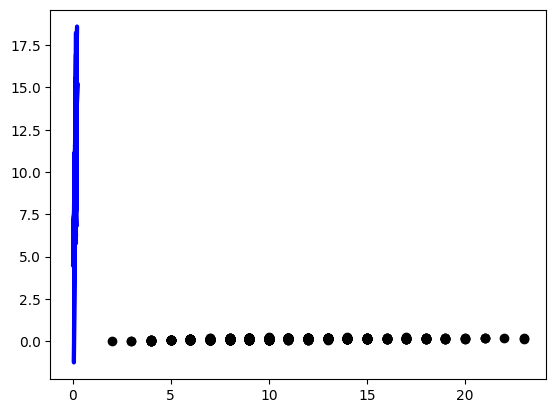

In [35]:
plt.scatter(y_test, X_test['height'],  color="black")
plt.plot(X_test['height'], y_pred_lr, color="blue", linewidth=3)

#plt.xticks(())
#plt.yticks(())

plt.show()

<Axes: xlabel='rings', ylabel='shell_weight'>

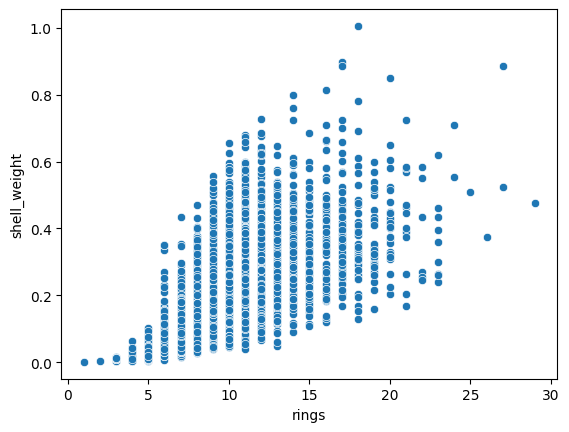

In [36]:
sns.scatterplot(data=df, x="rings", y="shell_weight")

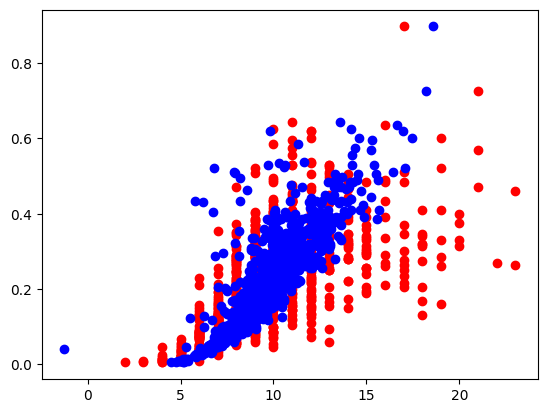

In [37]:
plt.scatter(y_test, X_test['shell_weight'],  color="red")
plt.scatter(y_pred_lr, X_test['shell_weight'],  color="blue")

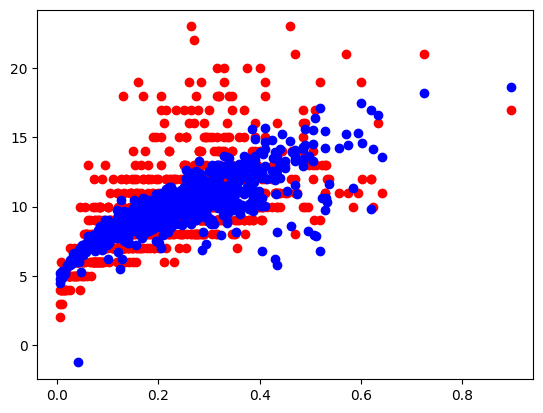

In [38]:
plt.scatter(X_test['shell_weight'], y_test, color="red")
plt.scatter(X_test['shell_weight'], y_pred_lr, color="blue")

Ridge

In [39]:
from sklearn.linear_model import Ridge

In [40]:
r = Ridge()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [41]:
param_grid = {
    'solver' : ['svd', 'cholesky', 'lsqr', 'sag'],
    'alpha' : [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100],
    'fit_intercept' : [True, False]
}

In [42]:
grid_search = GridSearchCV(estimator=r, param_grid=param_grid, cv=cv, scoring='neg_mean_absolute_error', n_jobs=-1)

In [43]:
grid_result = grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


In [44]:
print('Best Score: %s' % grid_result.best_score_)
print('Best Hyperparameters: %s' % grid_result.best_params_)

Best Score: -1.5936477210426712
Best Hyperparameters: {'alpha': 0.1, 'fit_intercept': True, 'solver': 'sag'}


In [45]:
model_r = Ridge(alpha= 0.1, fit_intercept= True, solver= 'sag')

In [46]:
model_r.fit(X_train, y_train)

Ridge(alpha=0.1, solver='sag')

In [47]:
model_r.score(X_test, y_test)

0.5071223494847781

In [48]:
y_pred_r = model_r.predict(X_test)

In [49]:
print(f'The MSE for Model ridge is: {mean_squared_error(y_test, y_pred_r)}')

The MSE for Model ridge is: 4.825979650216219


In [50]:
print(f'The MAE for Model ridge is: {mean_absolute_error(y_test, y_pred_r)}')

The MAE for Model ridge is: 1.5957629237759494


In [51]:
print(f'The R2 score for Model Ridge is: {r2_score(y_test, y_pred_r)}')

The R2 score for Model Ridge is: 0.5071223494847781


Random Forest Regressor

In [52]:
from sklearn.ensemble import RandomForestRegressor

In [53]:
rf = RandomForestRegressor()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [54]:
param_grid = {
    'max_depth': [1, 2, 3, 4],
    'n_estimators': [100, 150, 200, 250, 300]
}

In [55]:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=cv, scoring='neg_mean_absolute_error', n_jobs=-1)

In [56]:
grid_result = grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


In [57]:
print('Best Score: %s' % grid_result.best_score_)
print('Best Hyperparameters: %s' % grid_result.best_params_)

Best Score: -1.5961162048256472
Best Hyperparameters: {'max_depth': 4, 'n_estimators': 250}


In [58]:
model_rf = RandomForestRegressor(max_depth = 4, n_estimators = 250)

In [59]:
model_rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=4, n_estimators=250)

In [60]:
y_pred_rf = model_r.predict(X_test)

In [61]:
print(f'The MSE for Model ridge is: {mean_squared_error(y_test, y_pred_rf)}')

The MSE for Model ridge is: 4.825979650216219


In [62]:
print(f'The MAE for Model ridge is: {mean_absolute_error(y_test, y_pred_rf)}')

The MAE for Model ridge is: 1.5957629237759494


In [63]:
print(f'The R2 score for Model Ridge is: {r2_score(y_test, y_pred_rf)}')

The R2 score for Model Ridge is: 0.5071223494847781


Support Vector Regression

In [64]:
from sklearn.svm import SVR

In [65]:
svr = SVR()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [66]:
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel type
    'C': [0.1, 1, 10],  # Regularization parameter
    'gamma': ['scale', 'auto'],  # Kernel coefficient
    'epsilon': [0.1, 0.2, 0.5]  # Epsilon in the epsilon-SVR model
}

In [67]:
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, cv=cv, scoring='neg_mean_absolute_error', n_jobs=-1)

In [68]:
grid_result = grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


In [69]:
print('Best Score: %s' % grid_result.best_score_)
print('Best Hyperparameters: %s' % grid_result.best_params_)

Best Score: -1.4751790524127546
Best Hyperparameters: {'C': 10, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}


In [70]:
model_svr = SVR(C = 10, epsilon = 0.1, gamma = 'scale', kernel = 'rbf')

In [71]:
model_svr.fit(X_train, y_train)

SVR(C=10)

In [72]:
model_svr.score(X_test, y_test)

0.53432320066042

In [73]:
y_pred_svr = model_r.predict(X_test)

In [74]:
print(f'The MSE for Model ridge is: {mean_squared_error(y_test, y_pred_svr)}')

The MSE for Model ridge is: 4.825979650216219


In [75]:
print(f'The MAE for Model ridge is: {mean_absolute_error(y_test, y_pred_svr)}')

The MAE for Model ridge is: 1.5957629237759494


In [76]:
print(f'The R2 score for Model Ridge is: {r2_score(y_test, y_pred_svr)}')

The R2 score for Model Ridge is: 0.5071223494847781


Neural Networks

In [77]:
import tensorflow as tf

In [78]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('MSE')
  plt.legend()
  plt.grid(True)
  plt.show()

In [79]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(8,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='relu')
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='mean_squared_error')
  history = nn_model.fit(
    X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
  )

  return nn_model, history

#dropout layers helps prevent overfitting

16 nodes, dropout 0, lr 0.01, batch size 32


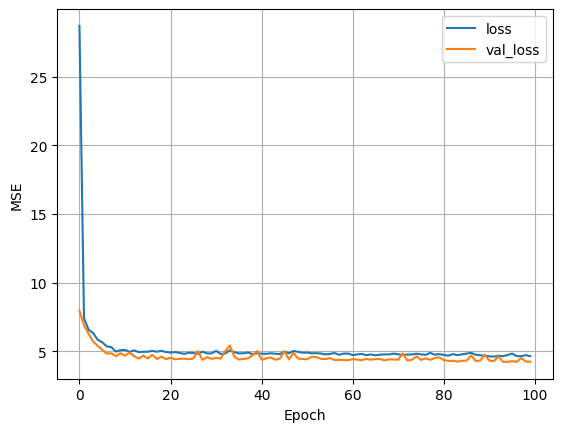

27/27 [==============================] - 0s 2ms/step - loss: 4.3673
16 nodes, dropout 0, lr 0.01, batch size 64


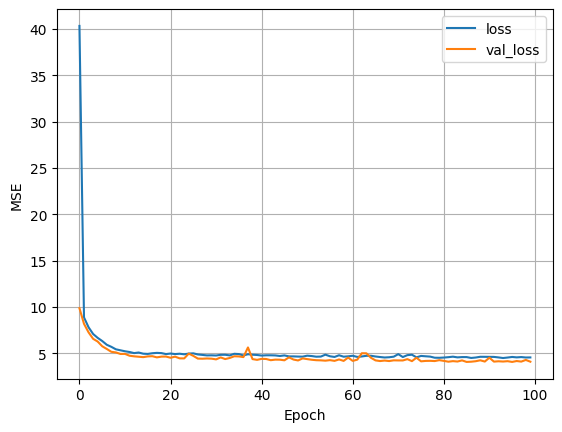

27/27 [==============================] - 0s 2ms/step - loss: 4.2472
16 nodes, dropout 0, lr 0.01, batch size 128


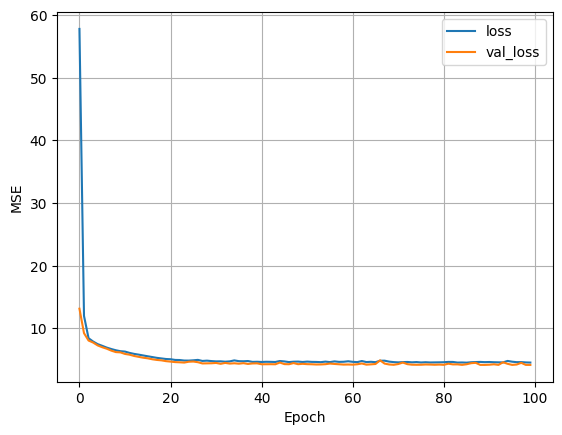

27/27 [==============================] - 0s 2ms/step - loss: 4.3549
16 nodes, dropout 0, lr 0.005, batch size 32


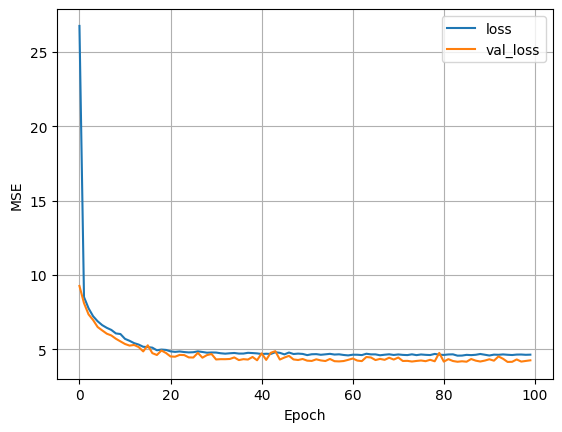

27/27 [==============================] - 0s 3ms/step - loss: 4.5183
16 nodes, dropout 0, lr 0.005, batch size 64


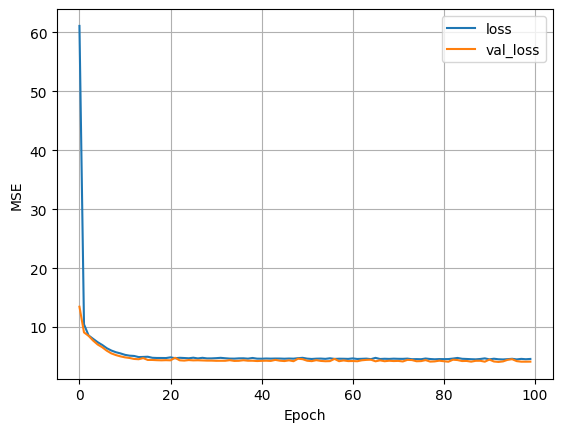

27/27 [==============================] - 0s 2ms/step - loss: 4.3646
16 nodes, dropout 0, lr 0.005, batch size 128


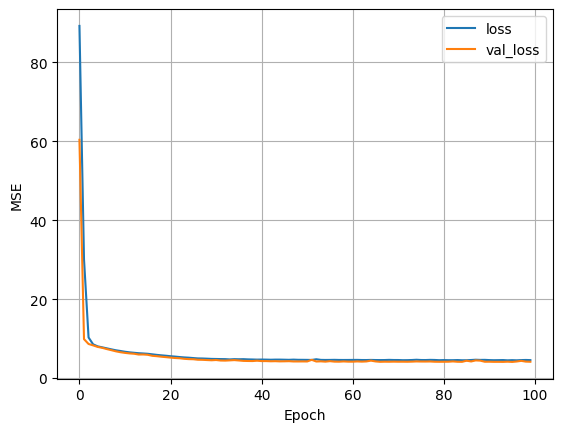

27/27 [==============================] - 0s 2ms/step - loss: 4.3094
16 nodes, dropout 0, lr 0.001, batch size 32


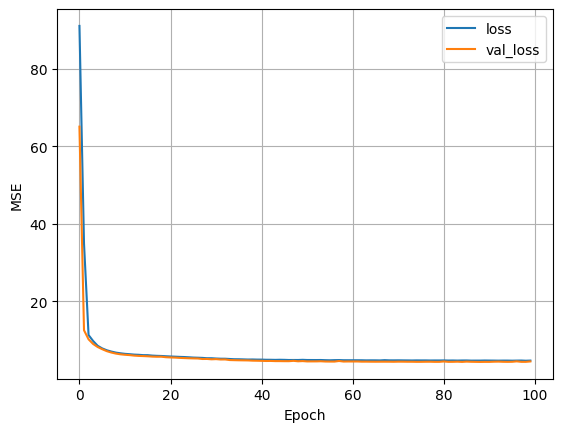

27/27 [==============================] - 0s 2ms/step - loss: 4.6203
16 nodes, dropout 0, lr 0.001, batch size 64


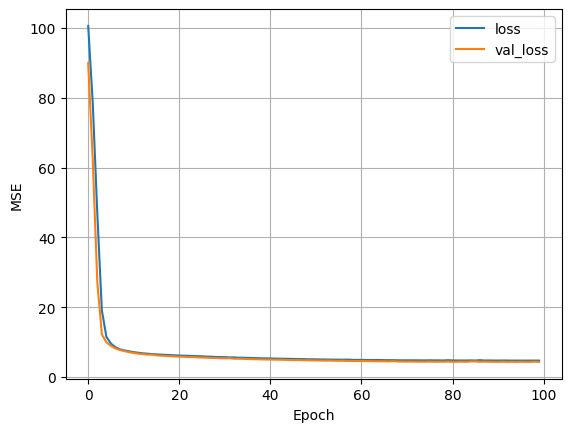

27/27 [==============================] - 0s 2ms/step - loss: 4.5567
16 nodes, dropout 0, lr 0.001, batch size 128


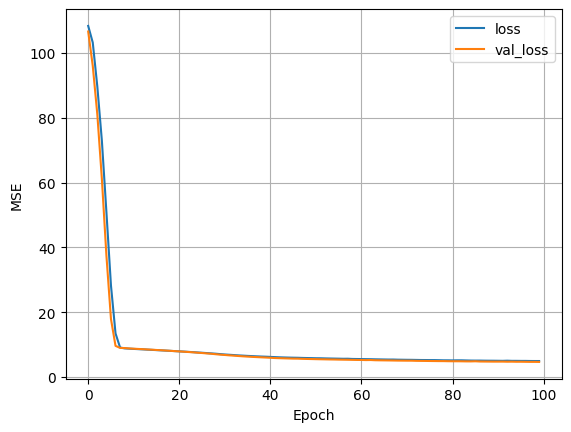

27/27 [==============================] - 0s 2ms/step - loss: 4.7826
16 nodes, dropout 0.2, lr 0.01, batch size 32


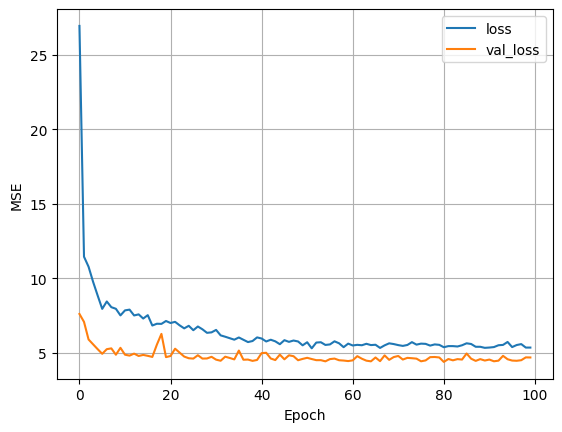

27/27 [==============================] - 0s 2ms/step - loss: 4.6737
16 nodes, dropout 0.2, lr 0.01, batch size 64


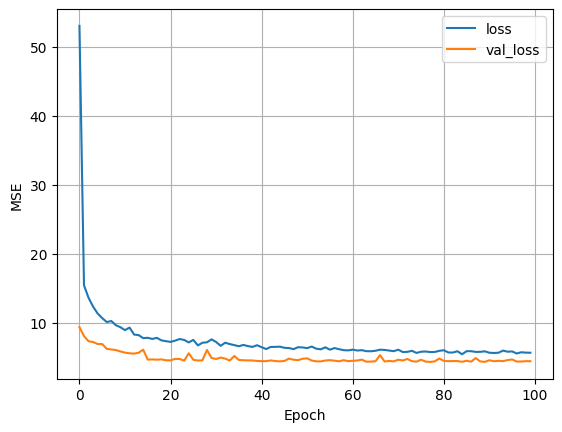

27/27 [==============================] - 0s 2ms/step - loss: 4.6038
16 nodes, dropout 0.2, lr 0.01, batch size 128


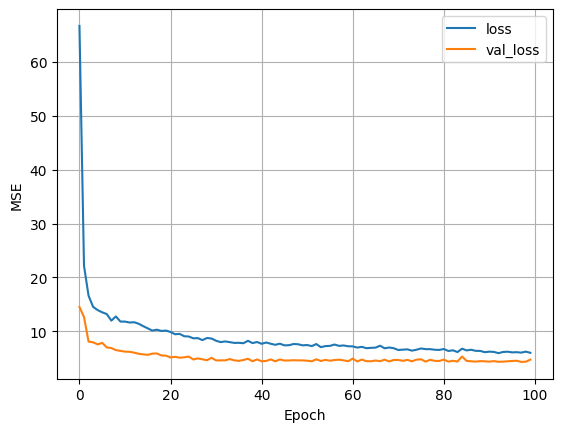

27/27 [==============================] - 0s 2ms/step - loss: 4.9603
16 nodes, dropout 0.2, lr 0.005, batch size 32


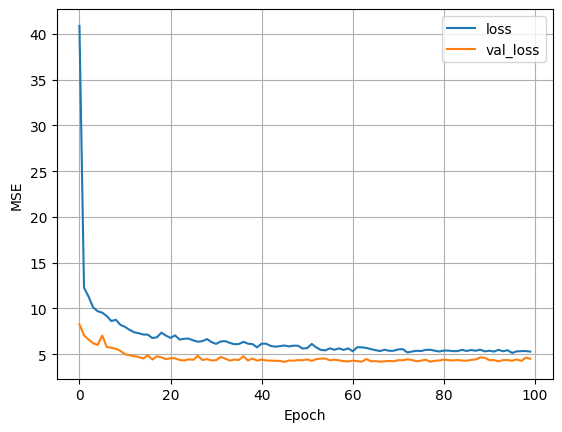

27/27 [==============================] - 0s 2ms/step - loss: 4.7071
16 nodes, dropout 0.2, lr 0.005, batch size 64


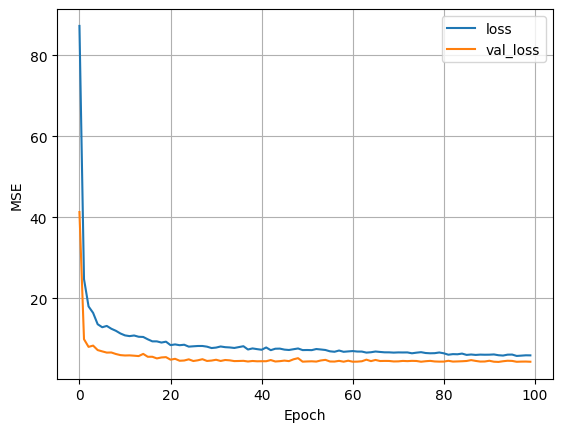

27/27 [==============================] - 0s 2ms/step - loss: 4.5072
16 nodes, dropout 0.2, lr 0.005, batch size 128


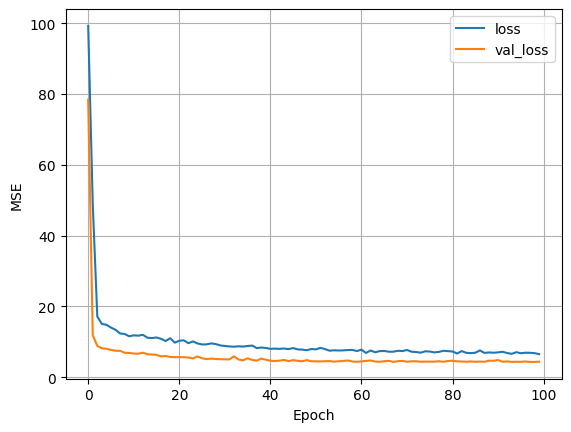

27/27 [==============================] - 0s 2ms/step - loss: 4.5925
16 nodes, dropout 0.2, lr 0.001, batch size 32


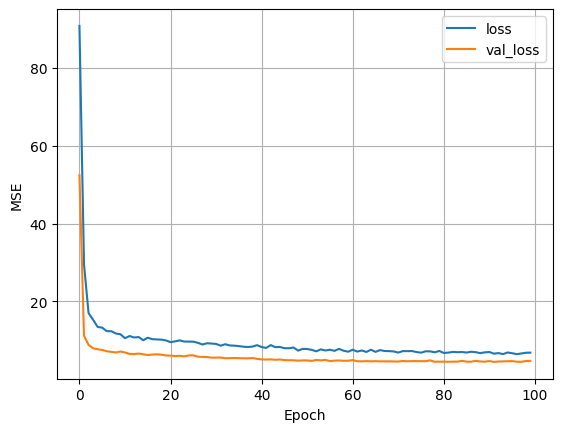

27/27 [==============================] - 0s 2ms/step - loss: 4.8980
16 nodes, dropout 0.2, lr 0.001, batch size 64


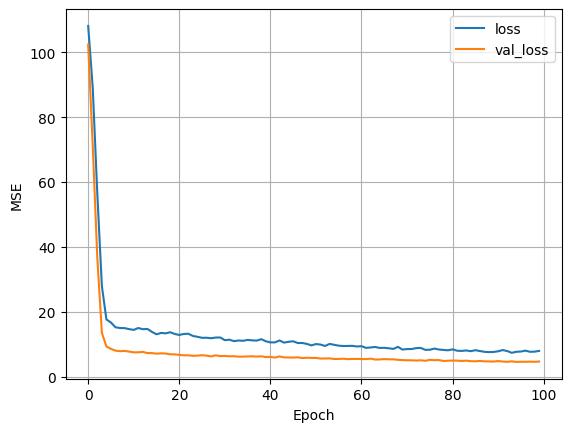

27/27 [==============================] - 0s 2ms/step - loss: 4.8839
16 nodes, dropout 0.2, lr 0.001, batch size 128


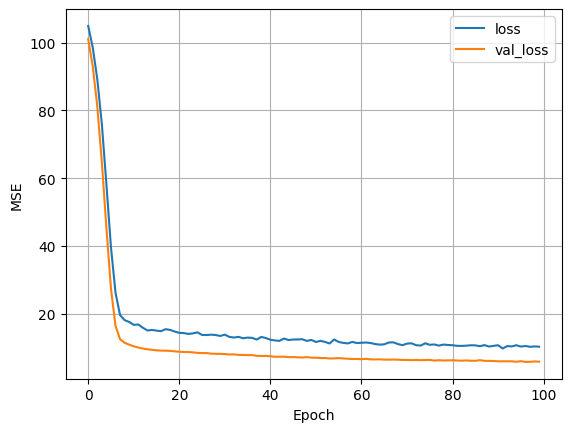

27/27 [==============================] - 0s 2ms/step - loss: 5.9281
32 nodes, dropout 0, lr 0.01, batch size 32


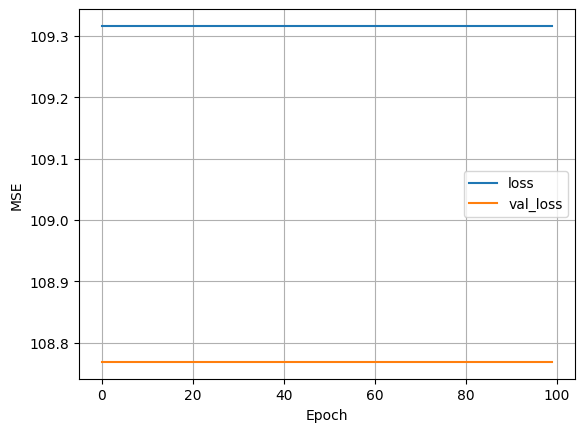

27/27 [==============================] - 0s 2ms/step - loss: 108.5275
32 nodes, dropout 0, lr 0.01, batch size 64


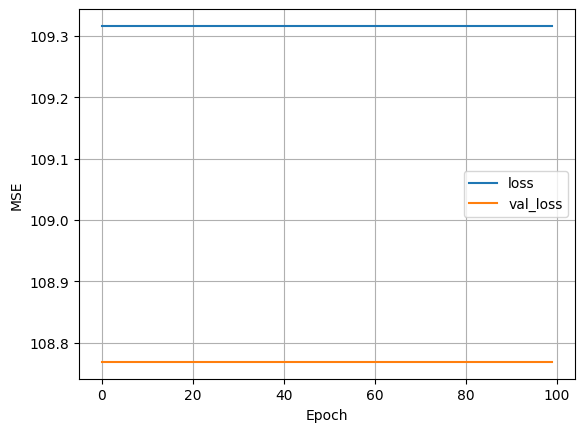

27/27 [==============================] - 0s 2ms/step - loss: 108.5275
32 nodes, dropout 0, lr 0.01, batch size 128


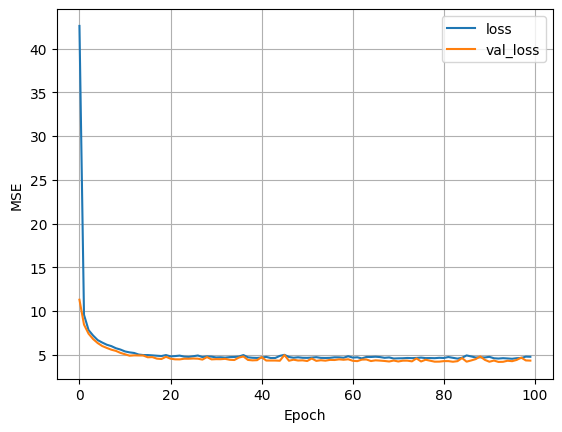

27/27 [==============================] - 0s 2ms/step - loss: 4.5699
32 nodes, dropout 0, lr 0.005, batch size 32


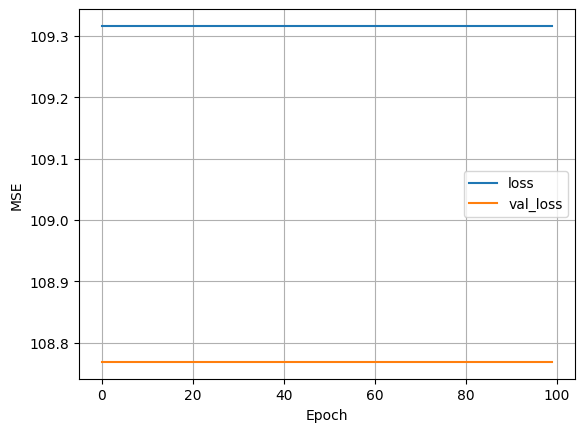

27/27 [==============================] - 0s 2ms/step - loss: 108.5275
32 nodes, dropout 0, lr 0.005, batch size 64


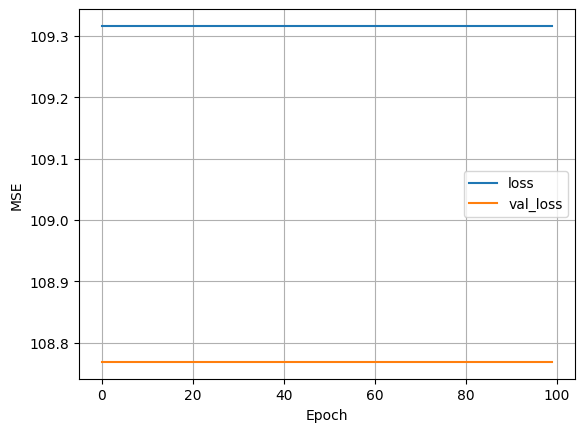

27/27 [==============================] - 0s 2ms/step - loss: 108.5275
32 nodes, dropout 0, lr 0.005, batch size 128


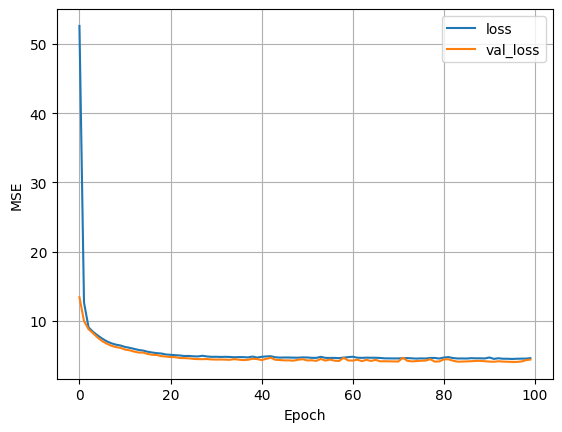

27/27 [==============================] - 0s 2ms/step - loss: 4.6568
32 nodes, dropout 0, lr 0.001, batch size 32


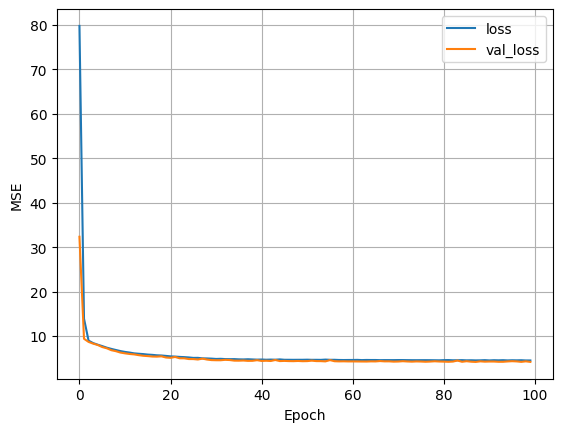

27/27 [==============================] - 0s 2ms/step - loss: 4.3726
32 nodes, dropout 0, lr 0.001, batch size 64


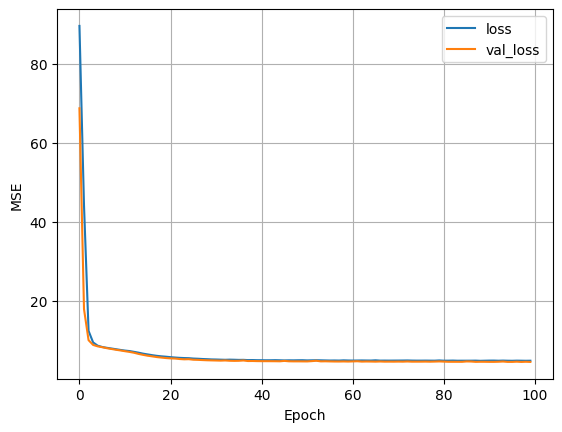

27/27 [==============================] - 0s 3ms/step - loss: 4.7175
32 nodes, dropout 0, lr 0.001, batch size 128


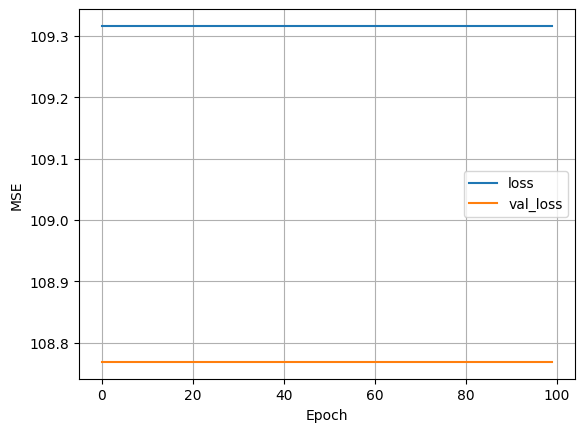

27/27 [==============================] - 0s 2ms/step - loss: 108.5275
32 nodes, dropout 0.2, lr 0.01, batch size 32


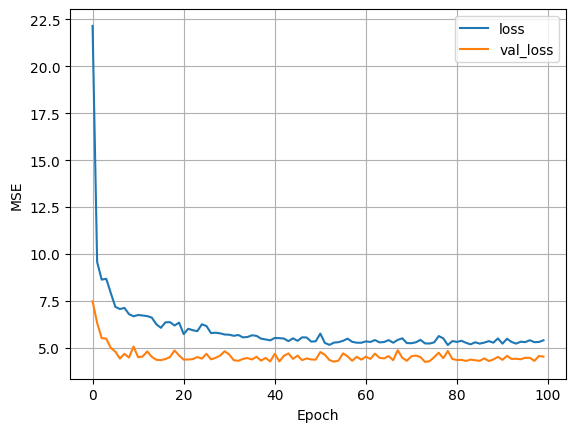

27/27 [==============================] - 0s 2ms/step - loss: 4.7431
32 nodes, dropout 0.2, lr 0.01, batch size 64


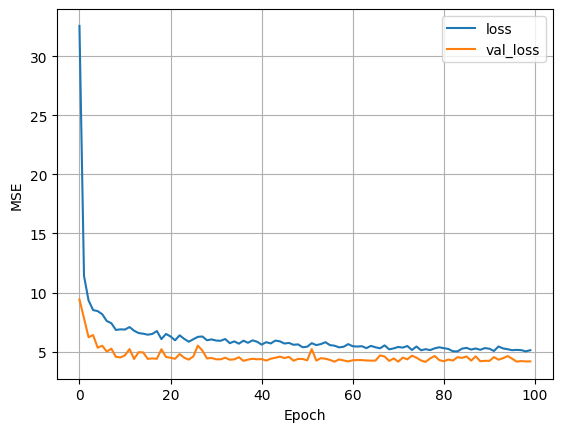

27/27 [==============================] - 0s 2ms/step - loss: 4.3461
32 nodes, dropout 0.2, lr 0.01, batch size 128


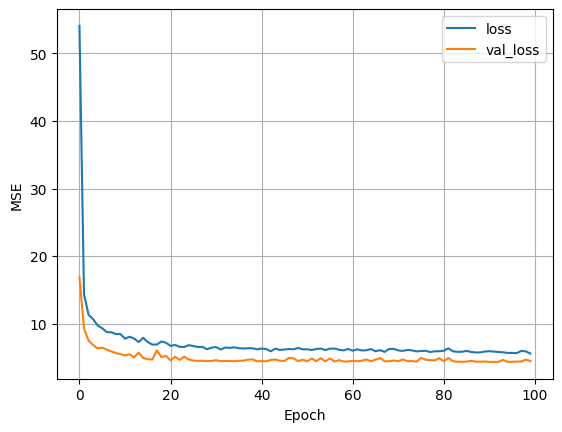

27/27 [==============================] - 0s 2ms/step - loss: 4.6264
32 nodes, dropout 0.2, lr 0.005, batch size 32


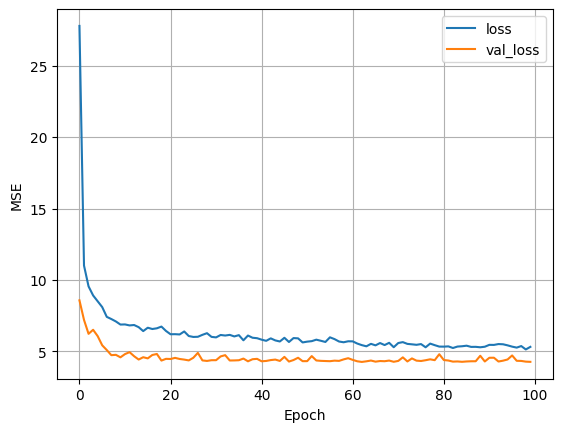

27/27 [==============================] - 0s 4ms/step - loss: 4.3895
32 nodes, dropout 0.2, lr 0.005, batch size 64


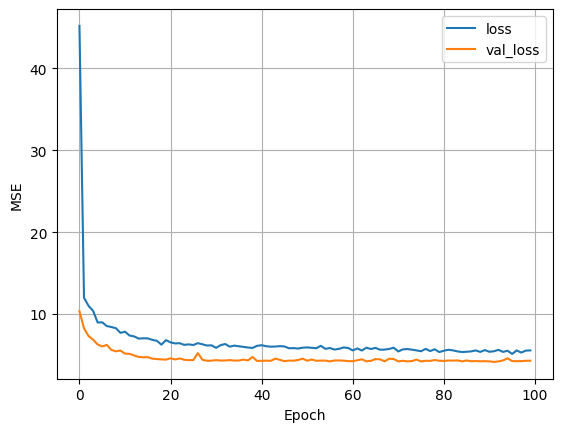

27/27 [==============================] - 0s 3ms/step - loss: 4.4490
32 nodes, dropout 0.2, lr 0.005, batch size 128


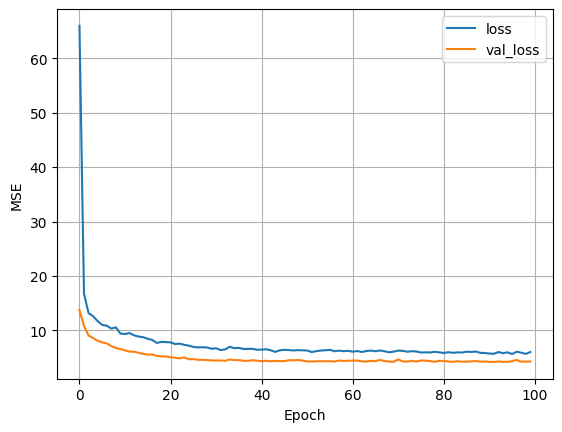

27/27 [==============================] - 0s 2ms/step - loss: 4.4056
32 nodes, dropout 0.2, lr 0.001, batch size 32


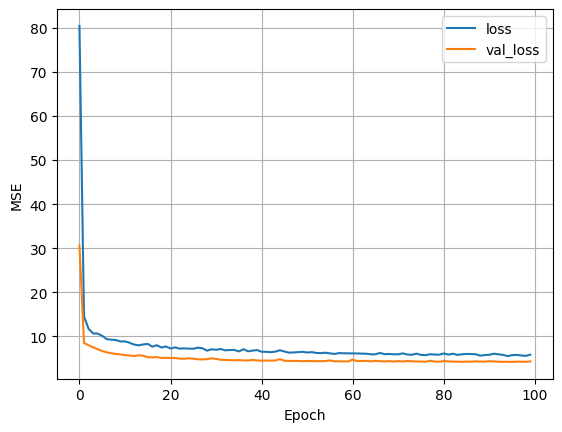

27/27 [==============================] - 0s 3ms/step - loss: 4.4981
32 nodes, dropout 0.2, lr 0.001, batch size 64


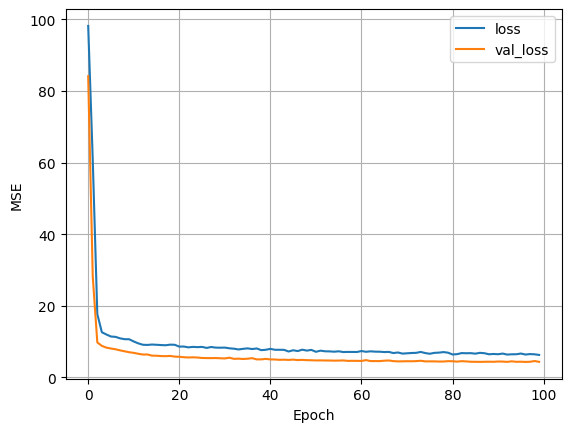

27/27 [==============================] - 0s 2ms/step - loss: 4.5012
32 nodes, dropout 0.2, lr 0.001, batch size 128


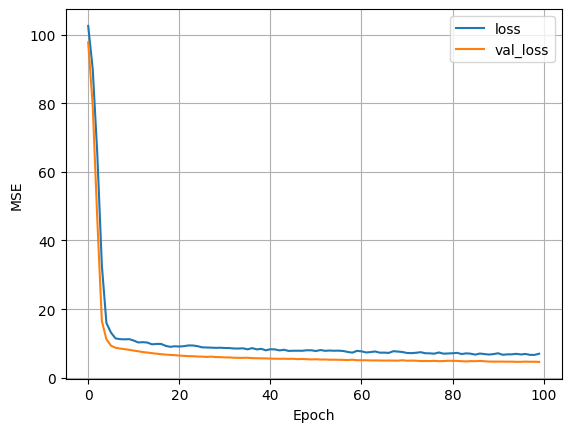

27/27 [==============================] - 0s 2ms/step - loss: 4.8112
64 nodes, dropout 0, lr 0.01, batch size 32


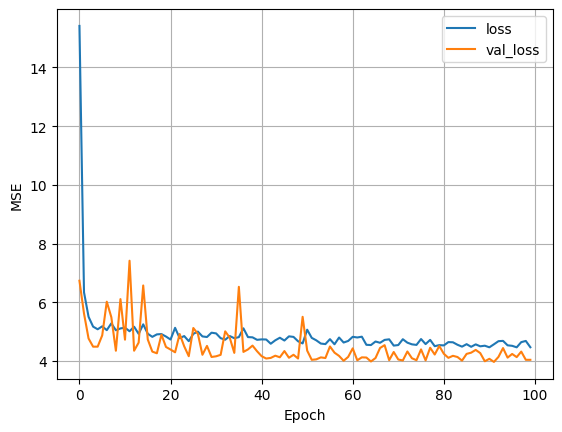

27/27 [==============================] - 0s 3ms/step - loss: 4.1522
64 nodes, dropout 0, lr 0.01, batch size 64


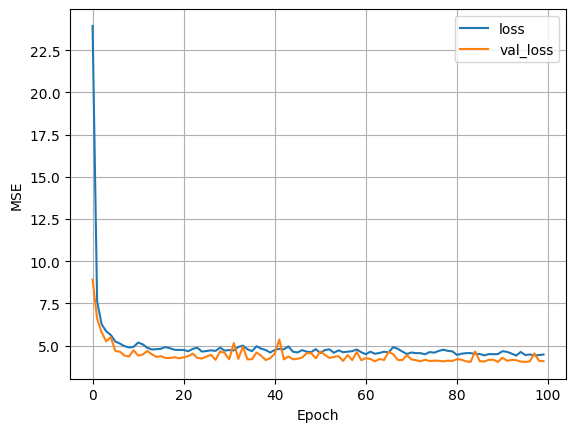

27/27 [==============================] - 0s 4ms/step - loss: 4.2061
64 nodes, dropout 0, lr 0.01, batch size 128


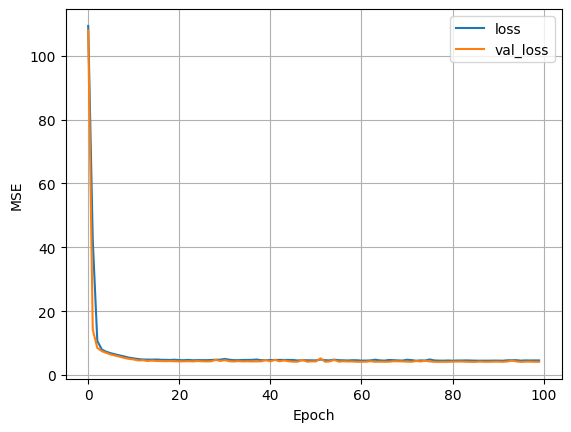

27/27 [==============================] - 0s 2ms/step - loss: 4.2812
64 nodes, dropout 0, lr 0.005, batch size 32


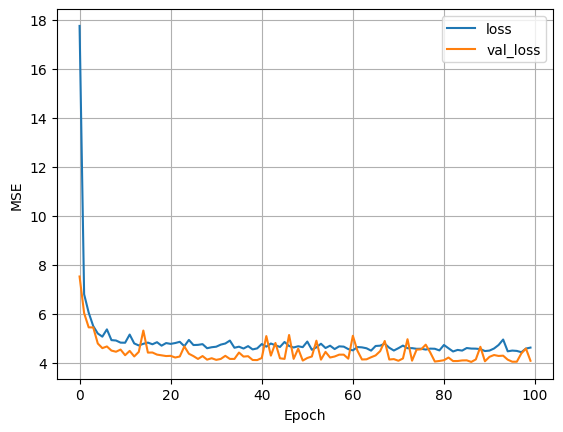

27/27 [==============================] - 0s 2ms/step - loss: 4.2063
64 nodes, dropout 0, lr 0.005, batch size 64


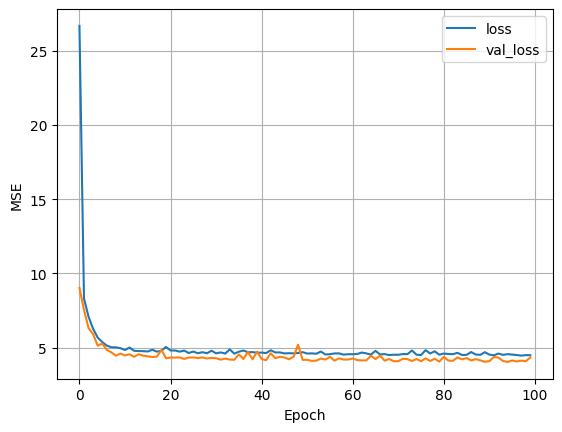

27/27 [==============================] - 0s 2ms/step - loss: 4.6110
64 nodes, dropout 0, lr 0.005, batch size 128


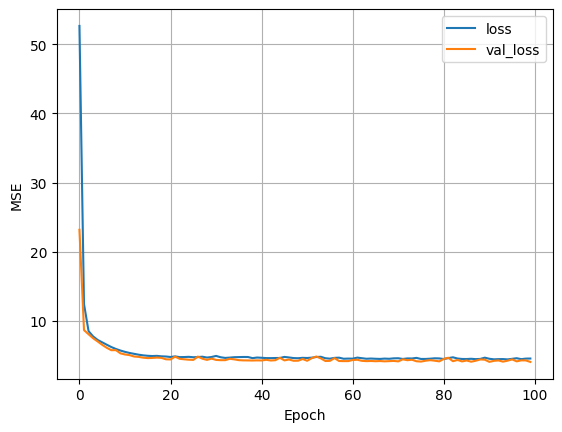

27/27 [==============================] - 0s 2ms/step - loss: 4.2538
64 nodes, dropout 0, lr 0.001, batch size 32


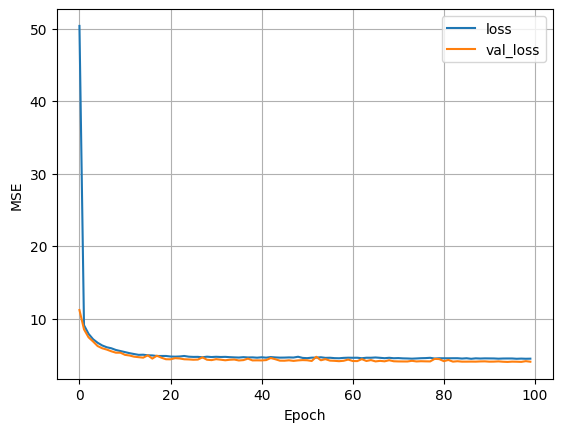

27/27 [==============================] - 0s 2ms/step - loss: 4.2019
64 nodes, dropout 0, lr 0.001, batch size 64


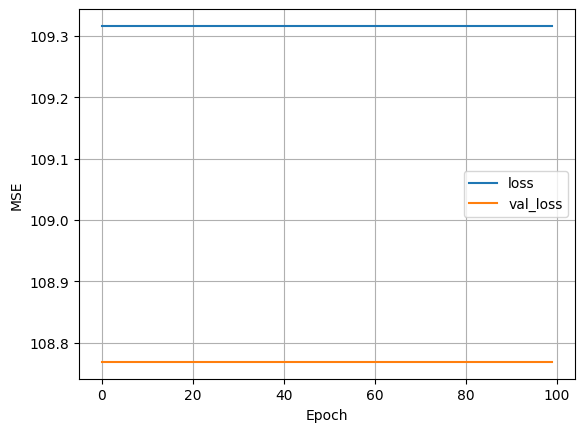

27/27 [==============================] - 0s 3ms/step - loss: 108.5275
64 nodes, dropout 0, lr 0.001, batch size 128


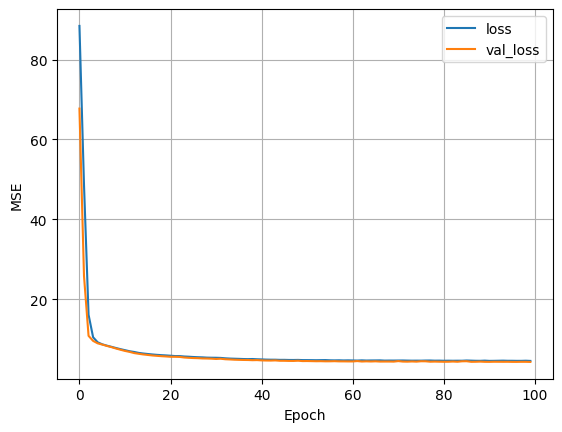

27/27 [==============================] - 0s 2ms/step - loss: 4.5030
64 nodes, dropout 0.2, lr 0.01, batch size 32


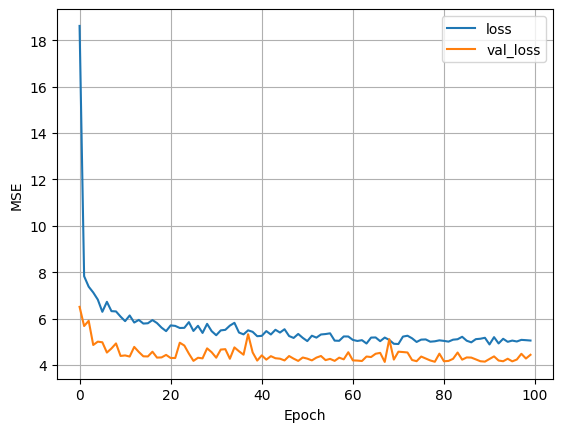

27/27 [==============================] - 0s 2ms/step - loss: 4.4367
64 nodes, dropout 0.2, lr 0.01, batch size 64


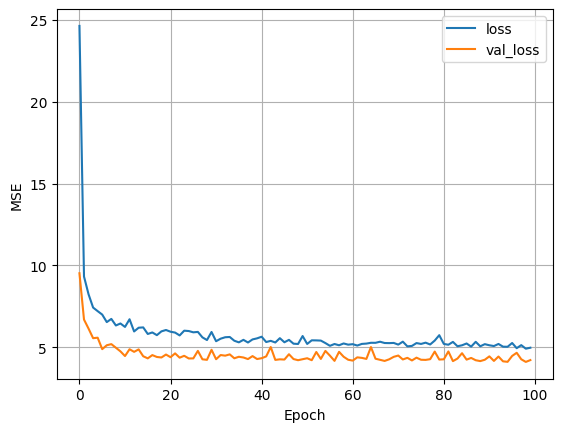

27/27 [==============================] - 0s 3ms/step - loss: 4.2295
64 nodes, dropout 0.2, lr 0.01, batch size 128


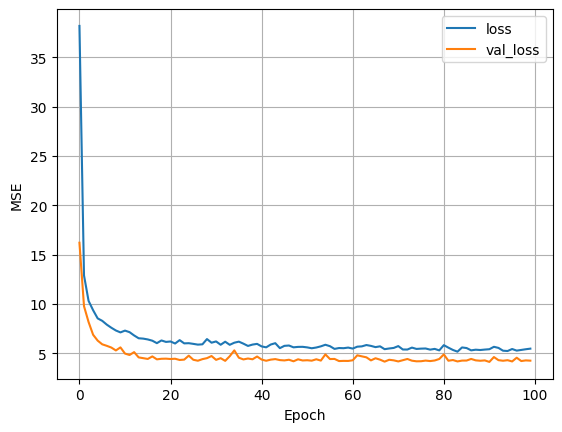

27/27 [==============================] - 0s 3ms/step - loss: 4.3996
64 nodes, dropout 0.2, lr 0.005, batch size 32


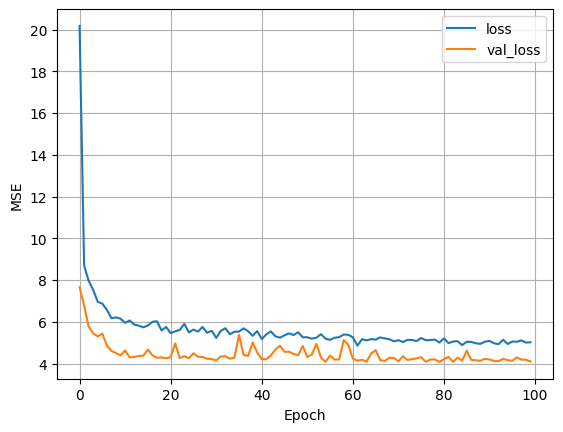

27/27 [==============================] - 0s 3ms/step - loss: 4.2644
64 nodes, dropout 0.2, lr 0.005, batch size 64


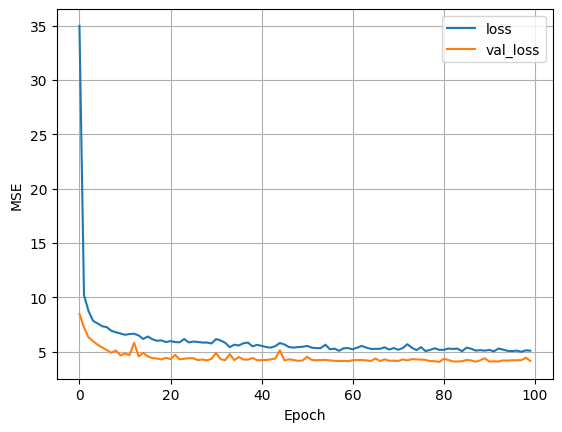

27/27 [==============================] - 0s 2ms/step - loss: 4.2735
64 nodes, dropout 0.2, lr 0.005, batch size 128


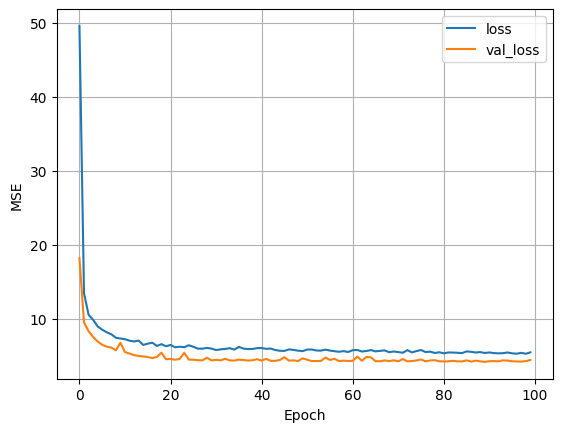

27/27 [==============================] - 0s 2ms/step - loss: 4.4374
64 nodes, dropout 0.2, lr 0.001, batch size 32


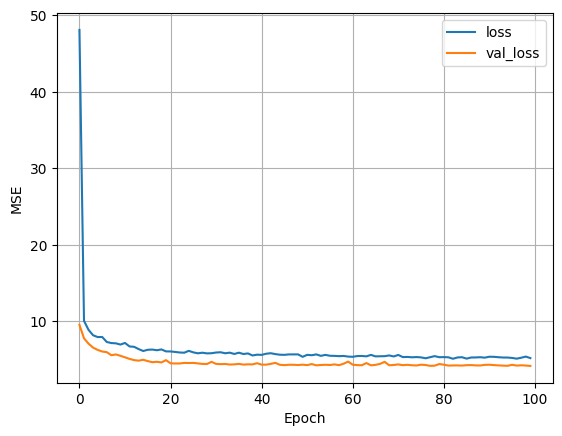

27/27 [==============================] - 0s 3ms/step - loss: 4.2940
64 nodes, dropout 0.2, lr 0.001, batch size 64


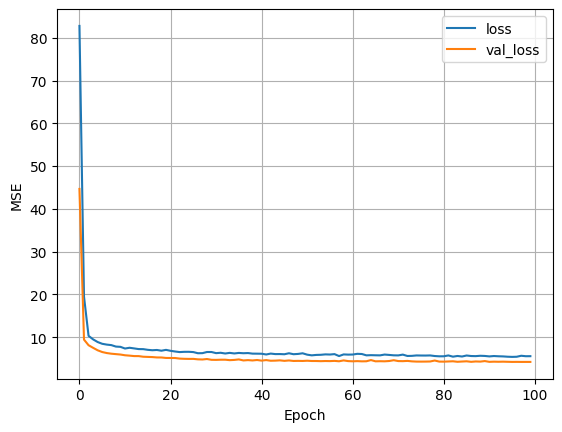

27/27 [==============================] - 0s 2ms/step - loss: 4.4076
64 nodes, dropout 0.2, lr 0.001, batch size 128


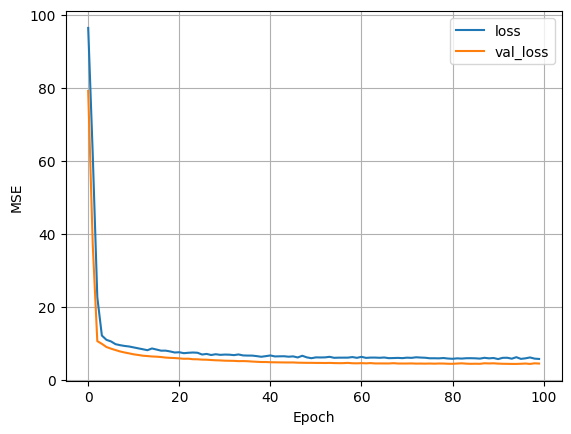

27/27 [==============================] - 0s 2ms/step - loss: 4.6455


In [80]:
least_val_loss = float('inf')
least_loss_model = None
epochs=100
for num_nodes in [16, 32, 64]:
  for dropout_prob in[0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
        model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_loss(history)
        val_loss = model.evaluate(X_test, y_test)
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model

In [81]:
y_pred_nn = least_loss_model.predict(X_test)

27/27 [==============================] - 0s 2ms/step


In [83]:
print(f'The MSE for Model ridge is: {mean_squared_error(y_test, y_pred_nn)}')

The MSE for Model ridge is: 4.1522438102092885


In [84]:
print(f'The MAE for Model ridge is: {mean_absolute_error(y_test, y_pred_nn)}')

The MAE for Model ridge is: 1.469325508797568


In [85]:
print(f'The R2 score for Model Ridge is: {r2_score(y_test, y_pred_nn)}')

The R2 score for Model Ridge is: 0.5759310395246621


RESULTS ANALYSIS

In [86]:
algorithm_analysis = {'Algorithm': ['Linear Regression', 'Ridge', 'Random Forest', 'SVR', 'Neural Networks'],
                  'MSE': [mean_squared_error(y_test, y_pred_lr), mean_squared_error(y_test, y_pred_r), mean_squared_error(y_test, y_pred_rf), mean_squared_error(y_test, y_pred_svr), mean_squared_error(y_test, y_pred_nn)],
                   'R2-Score': [r2_score(y_test, y_pred_lr), r2_score(y_test, y_pred_r), r2_score(y_test, y_pred_rf), r2_score(y_test, y_pred_svr), r2_score(y_test, y_pred_nn)]}
compare_algorithms = pd.DataFrame(data=algorithm_analysis)
compare_algorithms

,Algorithm,MSE,R2-Score
0,Linear Regression,4.824664,0.507257
1,Ridge,4.825980,0.507122
2,Random Forest,4.825980,0.507122
3,SVR,4.825980,0.507122
4,Neural Networks,4.152244,0.575931


IMPORT MODEL AND SCALER

In [106]:
import joblib
joblib.dump(least_loss_model, 'nn_model.sav')

['nn_model.sav']

In [104]:
x_try = X_test.iloc[4]
print(x_try)
print(f'The target should be: {y_test.iloc[4]}')
arr = x_try.values
reshaped_arr = arr.reshape((1, -1))
print(reshaped_arr.shape)
print(X_test.shape)

sex               0.0000
length            0.5250
diameter          0.3900
height            0.1350
whole_height      0.6005
shucked_weight    0.2265
viscera_weight    0.1310
shell_weight      0.2100
Name: 2383, dtype: float64
The target should be: 16
(1, 8)
(836, 8)


In [105]:
y_pred_try = least_loss_model.predict(reshaped_arr)
print(f'La prediccion del algoritmo es: {y_pred_try[0]}')

1/1 [==============================] - 0s 36ms/step
La prediccion del algoritmo es: [11.688001]
